# 11/19/2021
Vishnu Lasya Marthala - HW3-AIT 736
##### Sources used: 
https://machinelearningmastery.com/adaboost-ensemble-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [19]:
#setting the directory
import os
import numpy as np
import pandas as pd
os.chdir('D:\Fall 2021\Applied ML - AIT 736\HW3')
os.getcwd()

'D:\\Fall 2021\\Applied ML - AIT 736\\HW3'

In [20]:
#importing the data
input_file ='house-votes-84.data'
df = pd.read_csv(input_file,names=range(0,17))
df.head()
#df.pivot(index='T', columns='2')
df.iloc[:,:]
#df.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [21]:
df.shape

(435, 17)

In [23]:
#naming the columns in the dataframe
col_names = ['Class Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze',
             'el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile',
             'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports',
             'export-administration-act-south-africa']

df.columns = col_names

df.columns


Index(['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [24]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [25]:
#getting the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class Name                              435 non-null    object
 1   handicapped-infants                     435 non-null    object
 2   water-project-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution       435 non-null    object
 4   physician-fee-freeze                    435 non-null    object
 5   el-salvador-aid                         435 non-null    object
 6   religious-groups-in-schools             435 non-null    object
 7   anti-satellite-test-ban                 435 non-null    object
 8   aid-to-nicaraguan-contras               435 non-null    object
 9   mx-missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

In [26]:
#checking the number of categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 17 categorical variables

The categorical variables are :

 ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']


In [27]:
#data display
df[categorical].head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [28]:
#checking for null values in the data frame
df[categorical].isnull().sum()

Class Name                                0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [29]:
# view frequency counts of values in categorical variables
for var in categorical: 
    
    print(df[var].value_counts())

democrat      267
republican    168
Name: Class Name, dtype: int64
n    236
y    187
?     12
Name: handicapped-infants, dtype: int64
y    195
n    192
?     48
Name: water-project-cost-sharing, dtype: int64
y    253
n    171
?     11
Name: adoption-of-the-budget-resolution, dtype: int64
n    247
y    177
?     11
Name: physician-fee-freeze, dtype: int64
y    212
n    208
?     15
Name: el-salvador-aid, dtype: int64
y    272
n    152
?     11
Name: religious-groups-in-schools, dtype: int64
y    239
n    182
?     14
Name: anti-satellite-test-ban, dtype: int64
y    242
n    178
?     15
Name: aid-to-nicaraguan-contras, dtype: int64
y    207
n    206
?     22
Name: mx-missile, dtype: int64
y    216
n    212
?      7
Name: immigration, dtype: int64
n    264
y    150
?     21
Name: synfuels-corporation-cutback, dtype: int64
n    233
y    171
?     31
Name: education-spending, dtype: int64
y    209
n    201
?     25
Name: superfund-right-to-sue, dtype: int64
y    248
n    170
?     17
Name:

In [30]:
df['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

In [31]:
#replacing ? with unknown in all the columns
df['handicapped-infants'].replace('?', 'unknown', inplace=True)
df['water-project-cost-sharing'].replace('?', 'unknown', inplace=True)
df['adoption-of-the-budget-resolution'].replace('?', 'unknown', inplace=True)
df['physician-fee-freeze'].replace('?', 'unknown', inplace=True)
df['el-salvador-aid'].replace('?', 'unknown', inplace=True)
df['religious-groups-in-schools'].replace('?', 'unknown', inplace=True)
df['anti-satellite-test-ban'].replace('?', 'unknown', inplace=True)
df['aid-to-nicaraguan-contras'].replace('?', 'unknown', inplace=True)
df['mx-missile'].replace('?', 'unknown', inplace=True)
df['immigration'].replace('?', 'unknown', inplace=True)
df['synfuels-corporation-cutback'].replace('?', 'unknown', inplace=True)
df['superfund-right-to-sue'].replace('?', 'unknown', inplace=True)
df['crime'].replace('?', 'unknown', inplace=True)
df['duty-free-exports'].replace('?', 'unknown', inplace=True)
df['export-administration-act-south-africa'].replace('?', 'unknown', inplace=True)
df['education-spending'].replace('?', 'unknown', inplace=True)

In [32]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,unknown,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,unknown
2,democrat,unknown,y,y,unknown,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,unknown,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,unknown,y,y,y,y


In [33]:
for var in categorical: 
    print(df[var].value_counts())

democrat      267
republican    168
Name: Class Name, dtype: int64
n          236
y          187
unknown     12
Name: handicapped-infants, dtype: int64
y          195
n          192
unknown     48
Name: water-project-cost-sharing, dtype: int64
y          253
n          171
unknown     11
Name: adoption-of-the-budget-resolution, dtype: int64
n          247
y          177
unknown     11
Name: physician-fee-freeze, dtype: int64
y          212
n          208
unknown     15
Name: el-salvador-aid, dtype: int64
y          272
n          152
unknown     11
Name: religious-groups-in-schools, dtype: int64
y          239
n          182
unknown     14
Name: anti-satellite-test-ban, dtype: int64
y          242
n          178
unknown     15
Name: aid-to-nicaraguan-contras, dtype: int64
y          207
n          206
unknown     22
Name: mx-missile, dtype: int64
y          216
n          212
unknown      7
Name: immigration, dtype: int64
n          264
y          150
unknown     21
Name: synfuels-corp

In [34]:
#creating input dataframe and output column
X = df.drop(['Class Name'], axis=1)
y = df['Class Name']

In [35]:
X

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,unknown,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,unknown
2,unknown,y,y,unknown,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,unknown,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,unknown,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,n,unknown,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,n,n,n,y,y,y,unknown,unknown,unknown,unknown,n,y,y,y,n,y


In [36]:
y

0      republican
1      republican
2        democrat
3        democrat
4        democrat
          ...    
430    republican
431      democrat
432    republican
433    republican
434    republican
Name: Class Name, Length: 435, dtype: object

In [37]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.2


In [38]:
df.tail()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,unknown,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,unknown,unknown,unknown,unknown,n,y,y,y,n,y
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,unknown,n


In [39]:
X.shape, y.shape


((435, 16), (435,))

In [40]:
# printing the input and output features
X = df.iloc[0:, 1:17].values # 60 input features from the dataframe
y = df.iloc[:, 0].values  # class variable Rock - 1, Mine - 0
print(X.shape)
print(y.shape) 
type(X)

(435, 16)
(435,)


numpy.ndarray

In [42]:
X

array([['n', 'y', 'n', ..., 'y', 'n', 'y'],
       ['n', 'y', 'n', ..., 'y', 'n', 'unknown'],
       ['unknown', 'y', 'y', ..., 'y', 'n', 'n'],
       ...,
       ['n', 'unknown', 'n', ..., 'y', 'n', 'y'],
       ['n', 'n', 'n', ..., 'y', 'n', 'y'],
       ['n', 'y', 'n', ..., 'y', 'unknown', 'n']], dtype=object)

In [43]:
y

array(['republican', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'republican', 'democrat',
       'republican', 'republican', 'democrat', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'republican', 'republican', 'republican', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'republican', 'democrat',
       'republican', 'republican', 'republican', 'republican',
       'republican', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'republican', 'republican', 'republican', 'democrat',
       'democrat',

In [44]:
df

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,unknown,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,unknown
2,democrat,unknown,y,y,unknown,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,unknown,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,unknown,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,unknown,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,unknown,unknown,unknown,unknown,n,y,y,y,n,y


In [45]:

#converting categorical into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Class_Name_encoded = le.fit_transform(df['Class Name'])


In [47]:
  
handicapped_encoded = le.fit_transform(df['handicapped-infants'])
water_encoded = le.fit_transform(df['water-project-cost-sharing'])
adoption_encoded = le.fit_transform(df['adoption-of-the-budget-resolution'])
physician_encoded = le.fit_transform(df['physician-fee-freeze'])
el_encoded = le.fit_transform(df['el-salvador-aid'])
religious_encoded = le.fit_transform(df['religious-groups-in-schools'])
anti_encoded = le.fit_transform(df['anti-satellite-test-ban'])
aid_encoded = le.fit_transform(df['aid-to-nicaraguan-contras'])
mx_encoded = le.fit_transform(df['mx-missile'])
immigration_encoded = le.fit_transform(df['immigration'])
synfuels_encoded = le.fit_transform(df['synfuels-corporation-cutback'])
education_encoded = le.fit_transform(df['education-spending'])
superfund_encoded = le.fit_transform(df['superfund-right-to-sue'])
crime_encoded = le.fit_transform(df['crime'])
duty_encoded = le.fit_transform(df['duty-free-exports'])
export_encoded = le.fit_transform(df['export-administration-act-south-africa'])

In [48]:
df['Class Name'] = Class_Name_encoded 
df['handicapped-infants']=handicapped_encoded
df['water-project-cost-sharing']=water_encoded
df['adoption-of-the-budget-resolution']=adoption_encoded
df['physician-fee-freeze']=physician_encoded
df['el-salvador-aid']=el_encoded
df['religious-groups-in-schools']=religious_encoded
df['anti-satellite-test-ban']=anti_encoded
df['aid-to-nicaraguan-contras']=aid_encoded
df['mx-missile']=mx_encoded
df['immigration']=immigration_encoded
df['synfuels-corporation-cutback']=synfuels_encoded
df['superfund-right-to-sue']=superfund_encoded
df['crime']=crime_encoded
df['duty-free-exports']=duty_encoded
df['export-administration-act-south-africa']=export_encoded
df['education-spending']=education_encoded

In [51]:
df
# y-2, n-0,unknown-1
# 1- replublican , 0- democrat

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,2,0,2,2,2,0,0,0,2,1,2,2,2,0,2
1,1,0,2,0,2,2,2,0,0,0,0,0,2,2,2,0,1
2,0,1,2,2,1,2,2,0,0,0,0,2,0,2,2,0,0
3,0,0,2,2,0,1,2,0,0,0,0,2,0,2,0,0,2
4,0,2,2,2,0,2,2,0,0,0,0,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,0,0,2,2,2,2,0,0,2,2,0,2,2,2,0,2
431,0,0,0,2,0,0,0,2,2,2,2,0,0,0,0,0,2
432,1,0,1,0,2,2,2,0,0,0,0,2,2,2,2,0,2
433,1,0,0,0,2,2,2,1,1,1,1,0,2,2,2,0,2


In [52]:
# printing the input and output features
X1= df.iloc[0:, 1:17].values # 60 input features from the dataframe
y1 = df.iloc[:, 0].values  # class variable Rock - 1, Mine - 0
print(X.shape)
print(y.shape) 
type(X)

(435, 16)
(435,)


numpy.ndarray

In [60]:
X1

array([[0, 2, 0, ..., 2, 0, 2],
       [0, 2, 0, ..., 2, 0, 1],
       [1, 2, 2, ..., 2, 0, 0],
       ...,
       [0, 1, 0, ..., 2, 0, 2],
       [0, 0, 0, ..., 2, 0, 2],
       [0, 2, 0, ..., 2, 1, 0]])

In [61]:
y1

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

### Adaboost
Adaboost is an emsembling techniques (Boosting). In adaboost, the base learners(weak learners) are created sequentially. The output is based on the updation of weightsgiving more weight to the misclassifed samples and less weight to the correctly classified samples. The basic steps of Adaboost are the following:
1. We select the base learner with less impurity
2. Initially we assume all the records have the same weight
3. We find the total error of the incorrectly classified sample of the selected base leraner with less impurity
4. Then we find the performance of the base learner for updating the weights so that next base learner takes the errors of the current base learner
5. Here, the weights of the wrongly classified samples are increased and the weights of the correctly classified samples are decreased
6. Updation of the weights
7. Normalize the weights
8. create a new dataset based on the updated weights and repeat the process 

The 3 main ideas behind Adaboost are:

1. Adaboost combines a lot of weak learners to make the classification
2. Some base learners get more performance say than others
3. Each base learner is made based on the mistakes of the previous base learners




In [73]:
# Simple AdaBoost Classification using Decision Tree (default) (Stump)
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 0
num_trees = 30
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, X1, y1, cv=kfold)
decision_tree=results.mean()
print('accuracy: ',results.mean())
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X1, y1, cv=10)
conf_mat = confusion_matrix(y1, y_pred)
print('Confusion Matrix:\n',conf_mat)

accuracy:  0.9585623678646934
Confusion Matrix:
 [[258   9]
 [  8 160]]


>10 0.968 (0.031)
>50 0.962 (0.030)
>100 0.965 (0.028)
>500 0.956 (0.032)
>1000 0.953 (0.032)
>5000 0.946 (0.033)


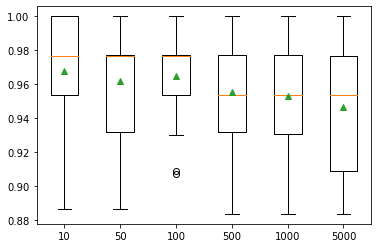

In [64]:
#explore no of trees
# explore adaboost ensemble number of trees effect on performance - with stratified sampling
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X = X1
	y = y1   
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# we can see that that performance improves on this dataset until about 50 trees and declines after that.
#This might be a sign of the ensemble overfitting the training dataset after additional trees are added.

#We can see the general trend of model performance and ensemble size in the below plot

In [65]:
#explore PLA algorithm

# evaluate adaboost algorithm with logistic regression weak learner for classification with startified sampling
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron


# define the model
model = AdaBoostClassifier(base_estimator=Perceptron(),algorithm='SAMME')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

Accuracy: 0.953 (0.032)


Random sampling: 
If we do random sampling to split the dataset into training_set and test_set in 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

Stratified Sampling: 
In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

In [80]:
#explore PLA algorithm

# evaluate adaboost algorithm with logistic regression weak learner for classification- without stratified sampling
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron


# define the model
model = AdaBoostClassifier(base_estimator=Perceptron(),algorithm='SAMME')
# evaluate the model
kfold = model_selection.KFold(n_splits=10)
#cv = RepeatedStratifiedKFold(n_splits=10)#, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=kfold)#, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 
Adaboost_logistic = (mean(n_scores))
                     
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X1, y1, cv=10)
conf_mat = confusion_matrix(y1, y_pred)
conf_mat

Accuracy: 0.949 (0.031)


array([[254,  13],
       [ 10, 158]], dtype=int64)

In [82]:
#import Voting Classifier - hard

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
#instantiating three classifiers

pla= Perceptron()
dTree= DecisionTreeClassifier()


model = VotingClassifier(estimators=[('percp', pla), ('tree',dTree)], voting='hard')
# evaluate the model
kfold = model_selection.KFold(n_splits=10)
#cv = RepeatedStratifiedKFold(n_splits=10)#,random_state=1)#n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=kfold)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 
combined = (mean(n_scores))
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X1, y1, cv=10)
conf_mat = confusion_matrix(y1, y_pred)
conf_mat
#Admittedly, in combining classifiers, one can also
#run in a situation where the selection of classifiers is so bad that
#the combined result is worse than that of some of the individual
#classifiers

Accuracy: 0.947 (0.031)


array([[259,   8],
       [ 16, 152]], dtype=int64)

In [70]:
#import Voting Classifier - hard - with stratified

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
#instantiating three classifiers

pla= Perceptron()
dTree= DecisionTreeClassifier()


model = VotingClassifier(estimators=[('PLA', pla), ('DecisionTree',dTree)], voting='hard')
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 


Accuracy: 0.950 (0.034)


In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X1, y1, cv=10)
conf_mat = confusion_matrix(y1, y_pred)
conf_mat

array([[257,  10],
       [ 17, 151]], dtype=int64)

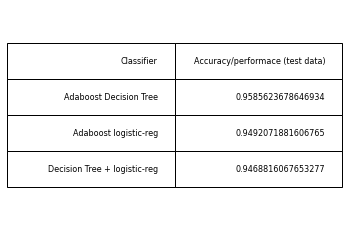

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#define figure and axes
fig, ax = plt.subplots()

#create values for table
table_data=[
    ["Classifier", 'Accuracy/performace (test data)'],
    ["Adaboost Decision Tree", decision_tree],
    ["Adaboost logistic-reg", Adaboost_logistic],
    ["Decision Tree + logistic-reg", combined]
   
]

#create table
table = ax.table(cellText=table_data, loc='center')

#modify table
table.set_fontsize(15)
table.scale(1,3)
ax.axis('off')

#display table
plt.show()

In [ ]:
#Admittedly, in combining classifiers, one can also
#run in a situation where the selection of classifiers is so bad that
#the combined result is worse than that of some of the individual
#classifiers

#here from the above table we can say that selection of the classifiers is not that good
# as the combined accuracy is less than the individual classifeir accuracy 